In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,roc_auc_score, precision_score, recall_score, f1_score , accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("data/outputs/stacking_level1.csv")

In [3]:
df.head()

,lgb_pred,xgb_pred,cat_pred,target
0,0.313471,0.322862,0.224750,0
1,0.323236,0.265648,0.435062,0
2,0.388162,0.476698,0.417425,0
3,0.112641,0.214988,0.219912,1
4,0.030355,0.015486,0.052058,0


In [4]:
X = df[['lgb_pred', 'xgb_pred', 'cat_pred']].values
y = df['target'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
n_features = X_train_scaled.shape[1]



In [8]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(n_features,)),  
    Dense(16, activation='relu'),                              
    Dense(1, activation='sigmoid')                           
])

e:\Bureau\imaneeeee\Credit-Card-Default-Prediction\proENv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile( optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit( X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=0)

In [12]:
nn_train_pred = model.predict(X_train_scaled)
nn_test_pred = model.predict(X_test_scaled)

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [13]:
X_meta_train = np.column_stack((X_train, nn_train_pred))
X_meta_test = np.column_stack((X_test, nn_test_pred))

In [14]:
meta_model = Ridge()
meta_model.fit(X_meta_train, y_train)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [15]:
final_pred = meta_model.predict(X_meta_test)

In [28]:
roc = roc_auc_score(y_test, final_pred)
final_pred_class = (final_pred > 0.5).astype(int)
precision = precision_score(y_test, final_pred_class)
recall = recall_score(y_test, final_pred_class)
f1 = f1_score(y_test, final_pred_class)
accuracy = accuracy_score(y_test, final_pred_class)

In [29]:
accuracy

0.8208333333333333

In [18]:
roc

0.7726564763076251

In [19]:
final_pred_class

array([0, 1, 0, ..., 0, 0, 0], shape=(1200,))

In [20]:
precision

0.6267605633802817

In [21]:
recall

0.3545816733067729

In [22]:
f1

0.4529262086513995

In [25]:
cm = confusion_matrix(y_test, final_pred_class)

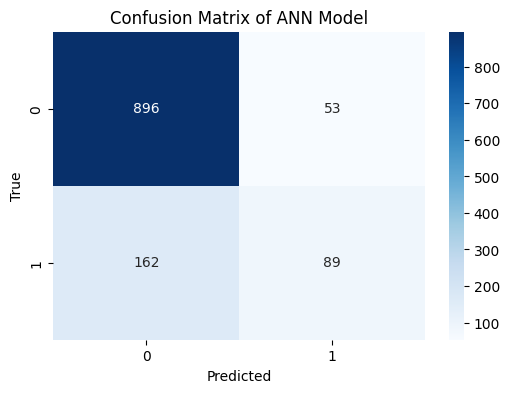

In [26]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of ANN Model")
plt.show()